<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x27fb9f8d850>,
 'caps': [<matplotlib.lines.Line2D at 0x27fb9f8de50>,
 'boxes': [<matplotlib.lines.Line2D at 0x27fb9f8d610>],
 'medians': [<matplotlib.lines.Line2D at 0x27fb9f8e300>],
 'fliers': [<matplotlib.lines.Line2D at 0x27fb9f8e600>],
 'means': []}

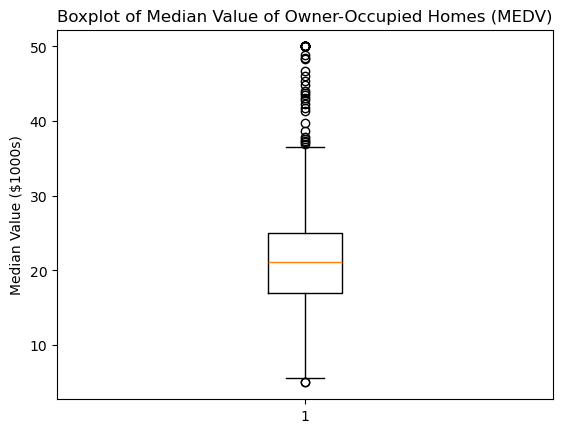

In [24]:

x=boston_df["MEDV"]
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
pyplot.ylabel("Median Value ($1000s)")
pyplot.boxplot(x)

In [40]:
chas_counts = boston_df['CHAS'].value_counts().sort_index()
chas_counts

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

<BarContainer object of 2 artists>

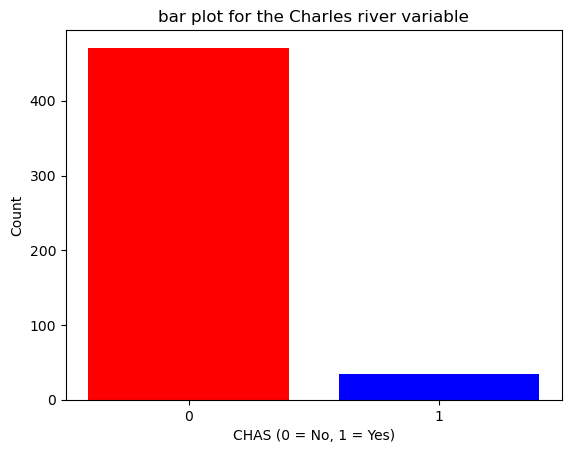

In [54]:
pyplot.title("bar plot for the Charles river variable")
Y=[0,1]
pyplot.xticks([0, 1], ["0", "1"]) 
pyplot.xlabel("CHAS (0 = No, 1 = Yes)")
pyplot.ylabel("Count")

pyplot.bar(chas_counts.index,chas_counts.values,color=["red","blue"])


<Axes: title={'center': 'Boxplot of Median Home Value (MEDV) by Age Group of Homes'}, xlabel='Age Group of Homes', ylabel='Median Value ($1000s)'>

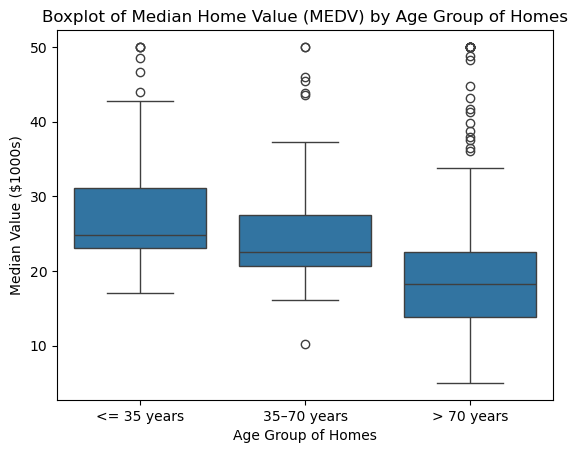

In [60]:
age_bins = [0, 35, 70, 100]
age_labels = ['<= 35 years', '35–70 years', '> 70 years']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels, right=True)
pyplot.title("Boxplot of Median Home Value (MEDV) by Age Group of Homes")
pyplot.xlabel("Age Group of Homes")
pyplot.ylabel("Median Value ($1000s)")
sns.boxplot(x="AGE_group",y="MEDV",data=boston_df)



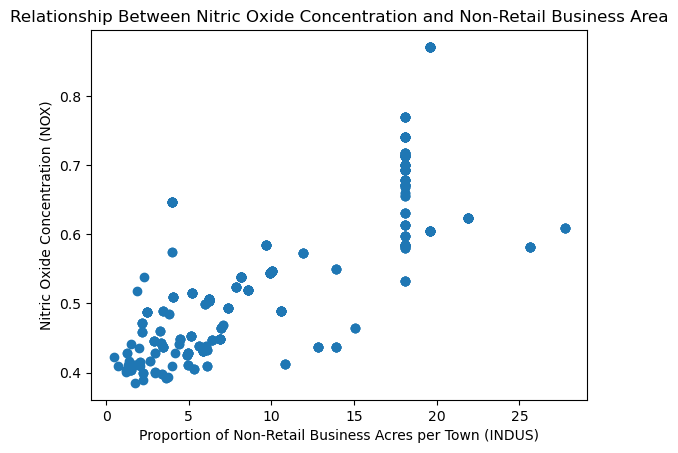

In [62]:
pyplot.title("Relationship Between Nitric Oxide Concentration and Non-Retail Business Area")
pyplot.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.scatter(boston_df['INDUS'], boston_df['NOX'])


(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

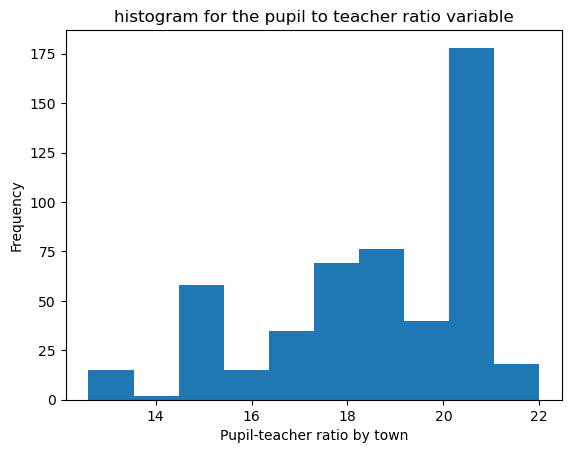

In [78]:
pyplot.title("histogram for the pupil to teacher ratio variable")
pyplot.xlabel("Pupil-teacher ratio by town")
pyplot.ylabel("Frequency")

pyplot.hist(boston_df["PTRATIO"])

In [96]:

bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = sc.ttest_ind(bounded_by_river, not_bounded_by_river)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 3.996437466090509, p-value: 7.390623170519905e-05


The p-value (0.0000739) is much less than α = 0.05.

Therefore, we reject the null hypothesis (H₀) and conclude that there is a significant difference in the median value of houses between those bounded by the Charles River and those not bounded by the river.


In [101]:
age_groups = boston_df['AGE_group']


f_stat, p_value_anova = sc.f_oneway(
    boston_df[age_groups == '<= 35 years']['MEDV'],
    boston_df[age_groups == '35–70 years']['MEDV'],
    boston_df[age_groups == '> 70 years']['MEDV']
)


print(f"F-statistic: {f_stat}, p-value: {p_value_anova}")

F-statistic: 36.40764999196599, p-value: 1.7105011022702984e-15


The p-value (1.71e-15) is much less than α = 0.05.

Therefore, we reject the null hypothesis (H₀) and conclude that there is a significant difference in the median values of houses across the different age groups of homes built before 1940.

In [104]:
correlation, p_value_corr = sc.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: {correlation}, p-value: {p_value_corr}")

Pearson Correlation: 0.7636514469209162, p-value: 7.913361061232958e-98


The p-value (7.91e-98) is much less than α = 0.05.

The correlation coefficient (0.7637) indicates a moderate to strong positive relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).


In [107]:
X = boston_df['DIS']
y = boston_df['MEDV']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        20:28:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0


The p-value for DIS (0.000) is less than α = 0.05, so we reject the null hypothesis.

Conclusion: We conclude that there is a significant relationship between the weighted distance to employment centers and the median value of owner-occupied homes. Specifically, as the weighted distance to employment centers increases, the median home value increases.